# step-1: Bussiness problem understanding
- identify relationship between total advertising spend and sales?
- our next ad campaign will have a total spend of $200,000 how many units do we expect to sell as a result of this?

# step-2 : Data understanding

#### Data
this sample displays for a particular product as a function of advertising budgets(in dollars), for tv, radio, and newpaper media

####  independent variables
- TV: Advertising dollars spent on tv for a single product in a given market (in dollars)
- Radio: Advertising dollars spent on radio
- Newspaper: Advertising dollars spent on Newspaper

#### Target variable
-sales:sales of a single product in a given market

-collect & load Data
-dataset understanding


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
df=pd.read_csv("C:\ProgramData\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# step 3-  preprocessing

In [77]:
df['total_spent']= df['TV']+ df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spent
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [78]:
df.drop(columns=['TV','radio','newspaper'], inplace=True)
df.head()

,sales,total_spent
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


## Expolatory Data Analysis (EDA)

In [79]:
df.describe()

,sales,total_spent
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


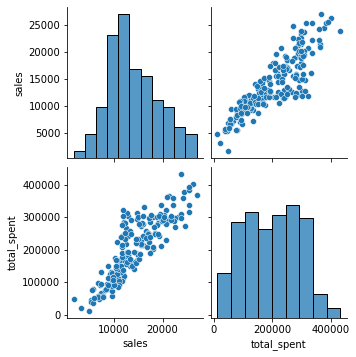

In [80]:
sns.pairplot(df)
plt.show()

In [81]:
df.corr()

,sales,total_spent
sales,1.000000,0.867712
total_spent,0.867712,1.000000


In [82]:
df.isnull().sum()

sales          0
total_spent    0
dtype: int64

In [83]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='total_spent', ylabel='Count'>

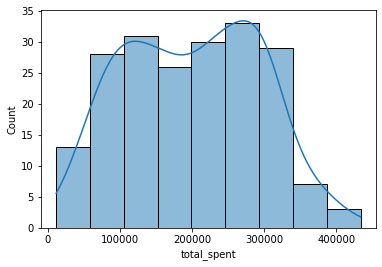

In [84]:
sns.histplot(df['total_spent'], kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


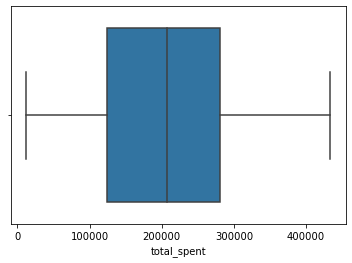

0.04948799338306648

In [85]:
sns.boxplot(df['total_spent'])
plt.show()
df['total_spent'].skew()

In [86]:
c_m=df[['total_spent', 'sales']].corr()
c_m

,total_spent,sales
total_spent,1.000000,0.867712
sales,0.867712,1.000000


<AxesSubplot:xlabel='sales', ylabel='Count'>

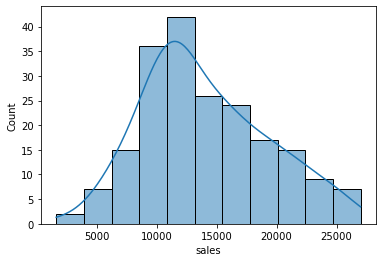

In [87]:
sns.histplot(df['sales'], kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.40757142507671335

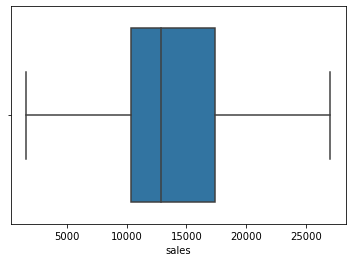

In [88]:
sns.boxplot(df['sales'])
df['sales'].skew()

In [89]:
X=df[['total_spent']]
y= df['sales']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=77)



In [91]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
print(model.coef_,model.intercept_)

[0.04784052] 4389.814518436082


In [92]:
y_pred=model.predict(X_test)


In [93]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mae

1915.90776501548

In [94]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
mse

5868943.149727303

In [95]:
import numpy as np 

rmse= np.sqrt(mse)
rmse

2422.590173704026

In [96]:
model.score(X_test,y_test)

0.7868779454628924

In [97]:
# check 1: wether test accuracy= train accuracy
#train accuracy
y_pred_train=model.predict(X_train)


mse=mean_squared_error(y_train, y_pred_train)
mse

rmse= np.sqrt(mse)
rmse

2628.0117251844995

In [98]:
# check 2:  wether the test accuracy= cross validation score
from sklearn.model_selection import cross_val_score

scores=cross_val_score(model,X,y, cv=5)
print(scores)

print ('cross validation score:', scores.mean())

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation score: 0.7433783178555419


In [99]:
#check 3: check wether , it satisfies the business problem requirement

In [100]:
#checkinf for assumptions


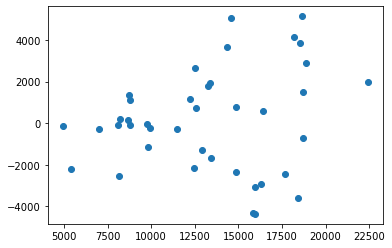

In [101]:
# 1. linearity of errors
error= y_test-y_pred
plt.scatter(y_pred, error)

plt.show()

In [102]:
#2.  normality of errors 

In [103]:
error.skew()

0.17729242735315792

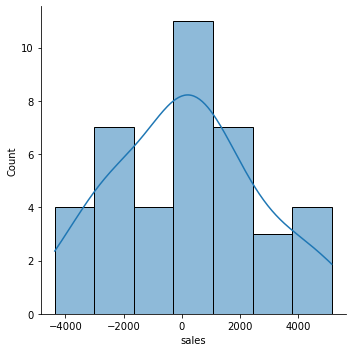

In [104]:
sns.displot(error,kde=True)
plt.show()

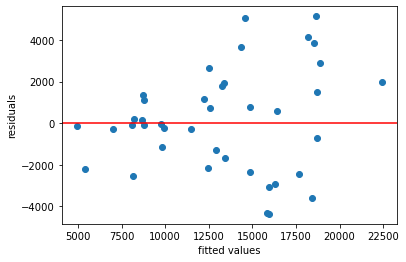

In [105]:
#3.  equal variance of errors

#observe number of errors above and below the line, then equal variance is present

plt.scatter(y_pred, error)
plt.axhline(y=0,color='red')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [106]:
#a 1 unit increase in total spend is associated with an oncrease of 0.0478 units in sales
# every 10000 dollars spend on ads, we could expect 478 more units sold

In [107]:
new_data=pd.DataFrame({'total_spent':[200000]})
new_data

,total_spent
0,200000


In [108]:
model.predict(new_data)

array([13957.91946809])

In [109]:
#save a model
from joblib import dump
dump(model,'sales_model.joblib')

['sales_model.joblib']

In [110]:
from joblib import load
first_model=load('sales_model.joblib')
first_model.predict([[200000]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13957.91946809])

In [111]:
X=df[['total_spent']]
y= df['sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.8, random_state=77)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
print(model.coef_,model.intercept_)
train_prediction=model.predict(X_train)
y_pred=model.predict(X_test)
print('Train R2', model.score(X_train,y_train))
print('test R2', model.score(X_test,y_test))
scores=cross_val_score(model,X,y, cv=5)
print(scores)

print ('cross validation score:', scores.mean())


[0.04784052] 4389.814518436082
Train R2 0.7426281082244577
test R2 0.7868779454628924
[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
cross validation score: 0.7433783178555419
